In [1]:
import obspy
from obspy.clients.fdsn import Client
from obspy import read, read_inventory, UTCDateTime, Stream

client = Client("IRIS")

In [14]:
import matplotlib.pyplot as plt

In [2]:
inventory = client.get_stations(station='DRV')

In [3]:
inventory

Inventory created at 2023-11-22T16:49:24.362100Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?station=DRV
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (2):
			G, SY
		Stations (2):
			G.DRV (Dumont d'Urville - Terre Adelie, Antarctica)
			SY.DRV (DRV synthetic)
		Channels (0):


In [4]:
starttime = UTCDateTime(2023,10,14,0,0,0)
endtime = UTCDateTime(2023,10,15,0,0,0)
st = client.get_waveforms(network='G', station='DRV', location='*', channel='BHZ', starttime=starttime, endtime=endtime)

In [10]:
T = st[0]
st

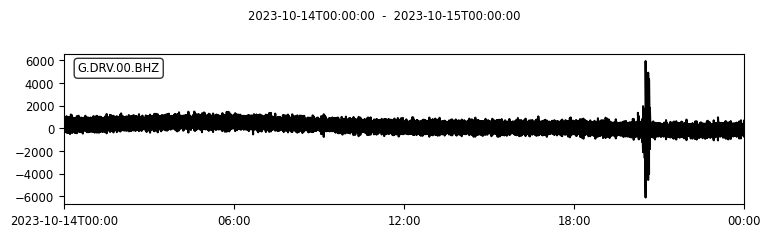

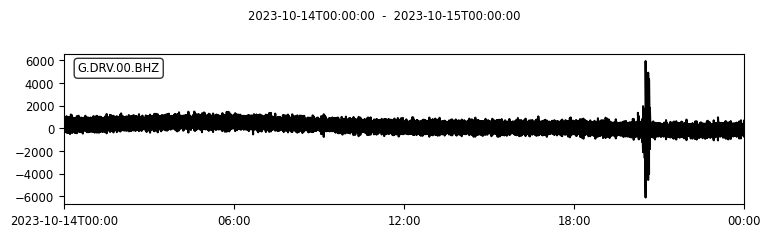

In [7]:
st.plot()

In [18]:
help(obspy.imaging.spectrogram.spectrogram)

Help on function spectrogram in module obspy.imaging.spectrogram:

spectrogram(data, samp_rate, per_lap=0.9, wlen=None, log=False, outfile=None, fmt=None, axes=None, dbscale=False, mult=8.0, cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f8787d7bc10>, zorder=None, title=None, show=True, clip=[0.0, 1.0])
    Computes and plots spectrogram of the input data.
    
    :param data: Input data
    :type samp_rate: float
    :param samp_rate: Samplerate in Hz
    :type per_lap: float
    :param per_lap: Percentage of overlap of sliding window, ranging from 0
        to 1. High overlaps take a long time to compute.
    :type wlen: int or float
    :param wlen: Window length for fft in seconds. If this parameter is too
        small, the calculation will take forever. If None, it defaults to a
        window length matching 128 samples.
    :type log: bool
    :param log: Logarithmic frequency axis if True, linear frequency axis
        otherwise.
    :type outfile: str
    :para

### Important parameters :
- `per lap` : overlap or not the windows for which the spectrum in amplitudes are calculated
- `wlen` : duration of the windows for which the the spectrum in amplitudes are calculated
- `dbscale` : colorscale based on decibels (log scale) instead of amplitude
- `clip` : define the color limits

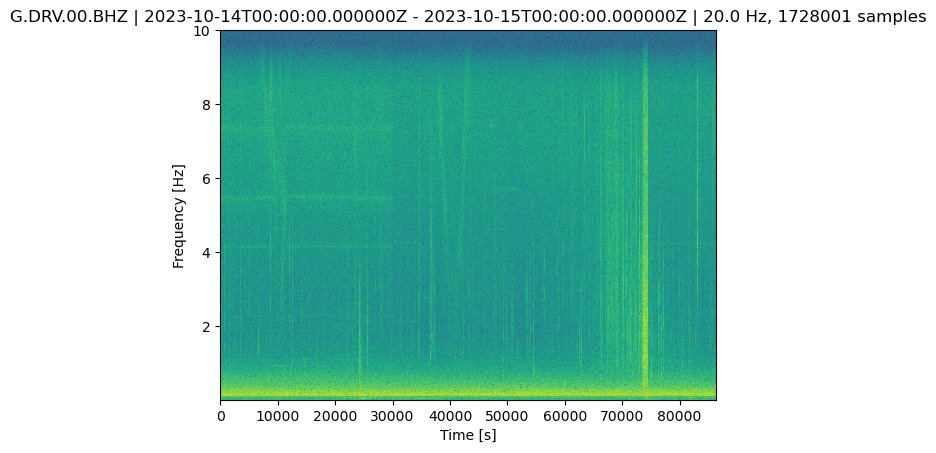

[None]

In [21]:
st.spectrogram(samp_rate=20, per_lap=.5, wlen=256, dbscale=True, clip=(0, 1))

## Spectrogramms with Scipy

In [9]:
import scipy.signal

In [16]:
help(scipy.signal.spectrogram)

Help on function spectrogram in module scipy.signal._spectral_py:

spectrogram(x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd')
    Compute a spectrogram with consecutive Fourier transforms.
    
    Spectrograms can be used as a way of visualizing the change of a
    nonstationary signal's frequency content over time.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `get_window` to generate the window values, which are
        DFT-even by default. See `get_window` for a list of windows and
        required parameters. If `window` is array_like it will be used
        directly as the window and its length 

In [12]:
f, t, Sxx = scipy.signal.spectrogram(x=T.data, fs=T.stats.sampling_rate, nfft=256)

Text(0.5, 0, 'Time [sec]')

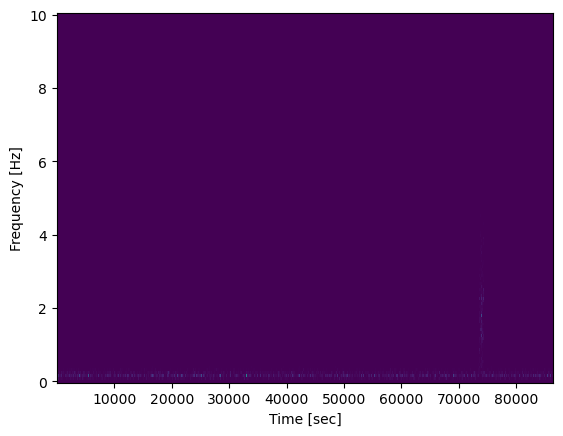

In [15]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')